In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

%matplotlib inline

# Importing and Analyzing the Dataset

In [5]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
print('Total Number of Unique Species: ', df.Species.nunique())
print('Unique Species', df.Species.unique())

Total Number of Unique Species:  3
Unique Species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<h1>Data Visualizations<h1>

C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

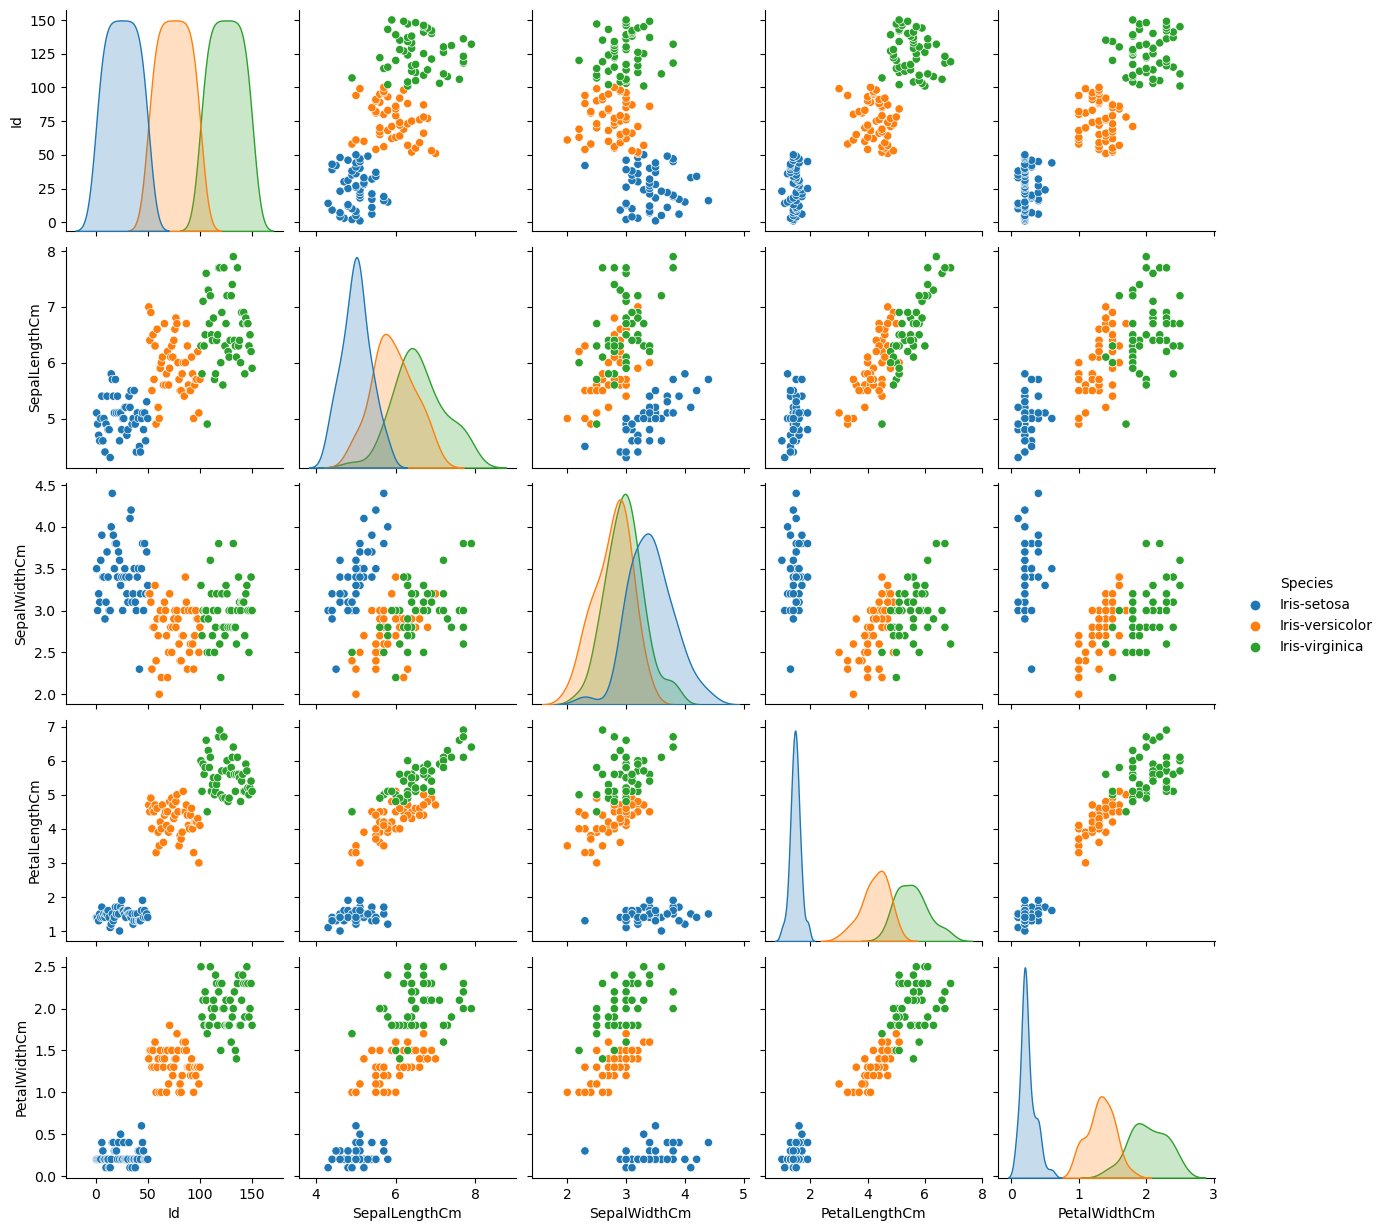

In [14]:
sns.pairplot(df, hue = 'Species')

Text(0.5, 1.0, 'Length of the Sepal (in Centimeters) Grouped by Species')

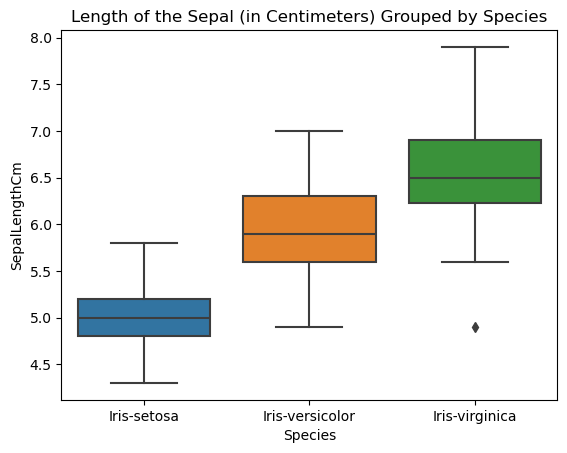

In [15]:
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df).set_title("Length of the Sepal (in Centimeters) Grouped by Species") 

C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Length of the Sepal (in Centimeters) Grouped by Species')

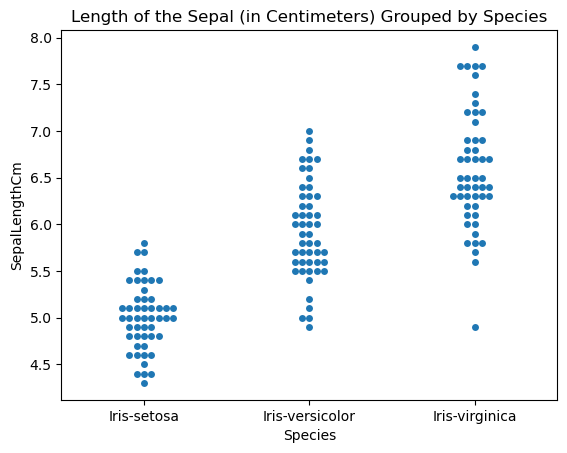

In [18]:
sns.swarmplot(x = 'Species', y = 'SepalLengthCm', data = df).set_title("Length of the Sepal (in Centimeters) Grouped by Species")

Text(0.5, 1.0, 'Length of the Sepal (in Centimeters) Grouped by Species')

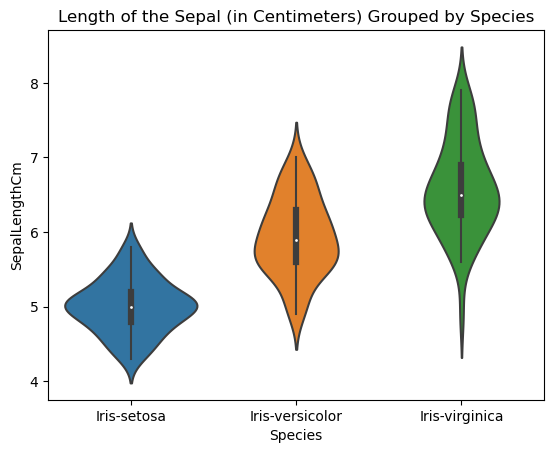

In [20]:
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = df).set_title("Length of the Sepal (in Centimeters) Grouped by Species")

Text(0.5, 1.0, 'Width of the Sepal (in Centimeters) Grouped by Species')

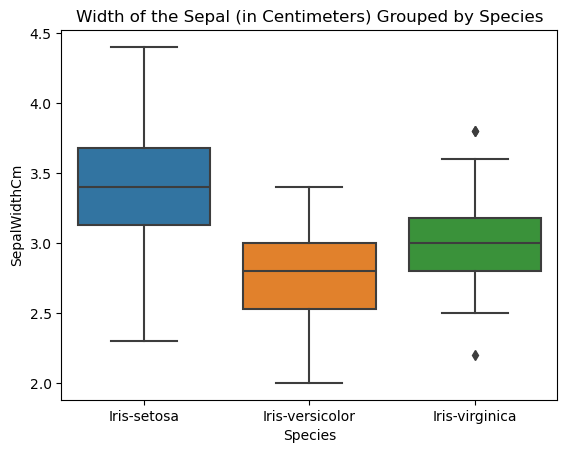

In [22]:
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df).set_title("Width of the Sepal (in Centimeters) Grouped by Species") 

C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Width of the Sepal (in Centimeters) Grouped by Species')

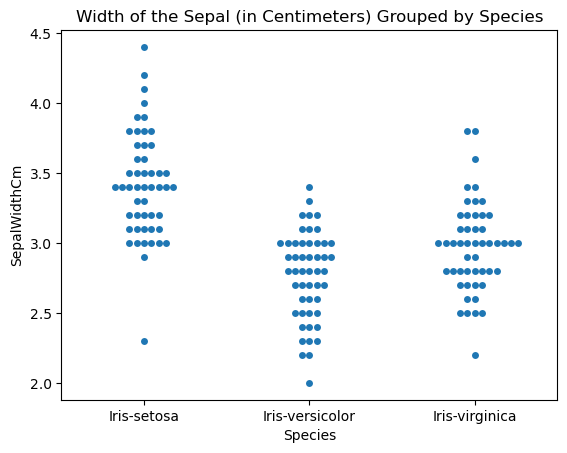

In [24]:
sns.swarmplot(x = 'Species', y = 'SepalWidthCm', data = df).set_title("Width of the Sepal (in Centimeters) Grouped by Species")

Text(0.5, 1.0, 'Width of the Sepal (in Centimeters) Grouped by Species')

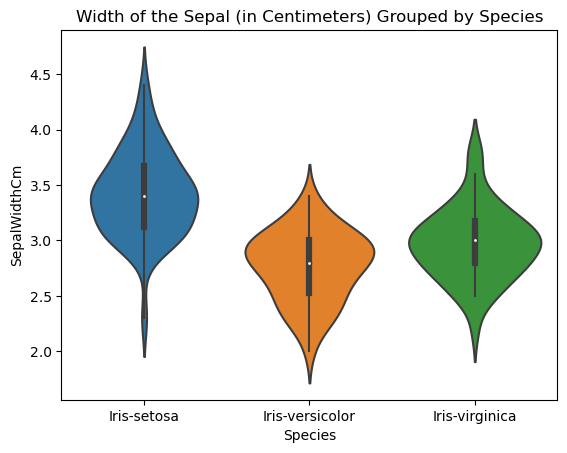

In [26]:
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = df).set_title("Width of the Sepal (in Centimeters) Grouped by Species")

Text(0.5, 1.0, 'Width of the Petal (in Centimeters) Grouped by Species')

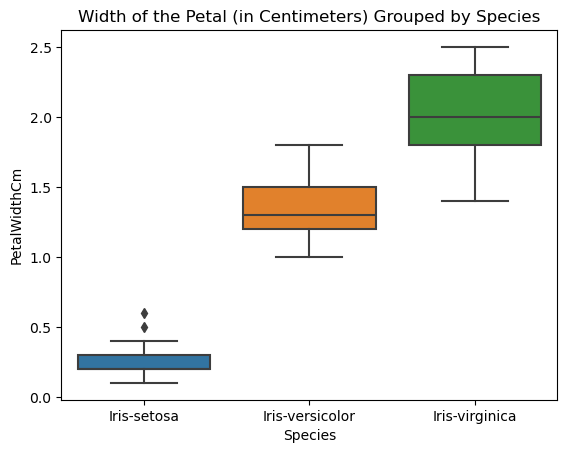

In [28]:
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df).set_title("Width of the Petal (in Centimeters) Grouped by Species") 

C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Width of the Petal (in Centimeters) Grouped by Species')

C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


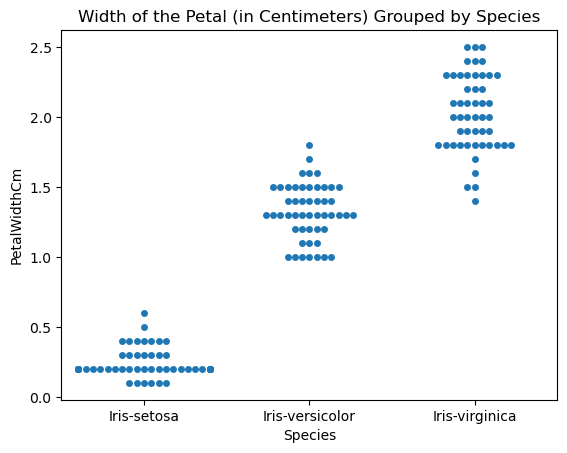

In [30]:
sns.swarmplot(x = 'Species', y = 'PetalWidthCm', data = df).set_title("Width of the Petal (in Centimeters) Grouped by Species")

# Data Preprocessing

In [35]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df[['Species']]
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [37]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Users\emuan\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Random Forest Classifier

In [44]:
clf = RandomForestClassifier(max_depth = 2, random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [46]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [48]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 0,  9]],

       [[19,  0],
        [ 0, 11]]], dtype=int64)

In [50]:
accuracy_score(y_test, y_pred, normalize = False)

30

In [52]:
accuracy_score(y_test, y_pred, normalize = True)

1.0

In [54]:
zero_one_loss(y_test, y_pred, normalize = False)

0

# Support Vector Classifier

In [57]:
clf = SVC(gamma = 'auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model Accuracy: ', clf.score(X_train, y_train))
print('Number of Correctly Classified Samples: ', accuracy_score(y_test, y_pred, normalize = False), ' out of ', len(y_pred))
print('Number of Support Vectors for each Class: ', clf.n_support_)

Model Accuracy:  0.9916666666666667
Number of Correctly Classified Samples:  30  out of  30
Number of Support Vectors for each Class:  [ 6 18 19]


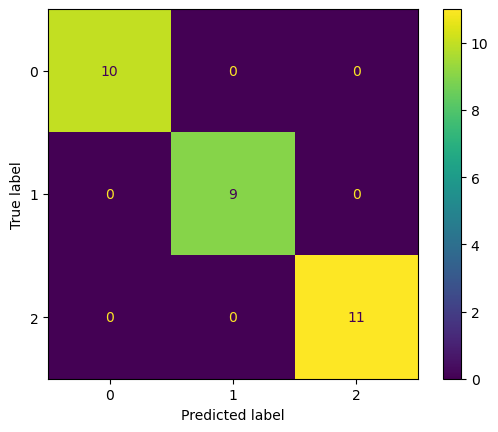

In [63]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)